<h2>Show how many chunks of each class we have</h2>
The database has to be chopped by ruuning data_chop_medley_db script

In [12]:
import os
import sys
import math
import numpy as np
import scipy, pylab
import scipy.io.wavfile as wave

import tensorflow as tf
import matplotlib.pyplot as plt

from scipy.fftpack import dct
from spectrograms import *
from data_classes import *
%matplotlib inline

In [13]:
# Provide data paths

DATA_CHOPPED_PATH = "/media/ubuntu/DATA/MIR/Chopped"
DATA_MEDLEY_DB_PATH = "/media/ubuntu/AE08E30B08E2D17F/MedleyDB/Audio"


In [14]:
chunks_per_song = {}
chunks_per_instrument = {}
for song in os.listdir(DATA_CHOPPED_PATH):
    raw = song + "_RAW"
    if not os.path.exists(os.path.join(DATA_CHOPPED_PATH, song, raw)):
        continue
    collect_chunks_per_instrument(DATA_MEDLEY_DB_PATH, DATA_CHOPPED_PATH, song, chunks_per_instrument)
    chunks_per_song[song] = 0
    for track in os.listdir(os.path.join(DATA_CHOPPED_PATH, song, raw)):
        for chunk in os.listdir(os.path.join(DATA_CHOPPED_PATH, song, raw, track)):
            chunks_per_song[song] += 1
        
#chunks_per_song    
for k, v in chunks_per_instrument.items():
    chunks_per_instrument[k] = len(v)
    
chunks_per_instrument    
    

{'banjo, mandolin': 1090,
 'bass': 7229,
 'bells, chimes': 98,
 'brass': 1558,
 'drums or perc': 36628,
 'electric guitar': 3435,
 'guitar': 8877,
 'keyboards': 12279,
 'strings': 5236,
 'vibraphone': 842,
 'vocals or speech': 8544,
 'woodwind': 1262}

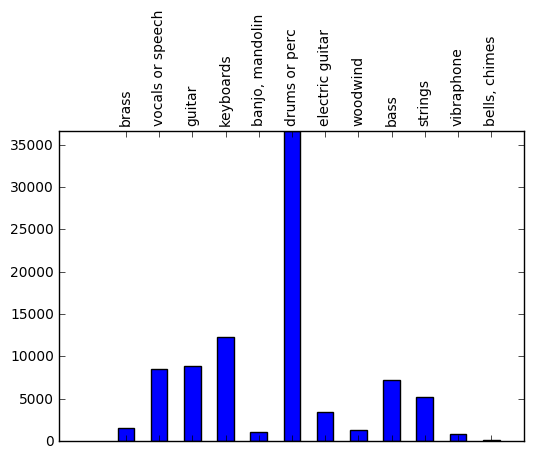

In [16]:
data = chunks_per_instrument
X = np.arange(len(data))
pylab.bar(X, data.values(), align='center', width=0.5)
pylab.xticks(X, data.keys())

for tick in pylab.gca().xaxis.iter_ticks():
    tick[0].label2On = True
    tick[0].label1On = False
    tick[0].label2.set_rotation('vertical')

ymax = max(data.values()) + 1
pylab.ylim(0, ymax)
pylab.show()



<h2>For the minimal learning example we'll try to cap the classes in a way that we get 40k examples total</h2>

In [18]:
CAP_LIMIT=40000

In [22]:
a = [1,2,3]
print(a.pop(0),a)
a

1 [2, 3]


[2, 3]